In [2]:
%matplotlib inline

import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
import pickle
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io

from scipy.ndimage.measurements import label
from scipy.ndimage.morphology import binary_dilation, grey_dilation

from util import *

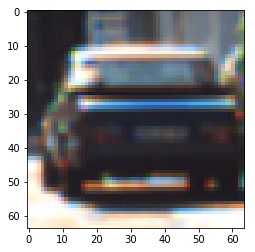

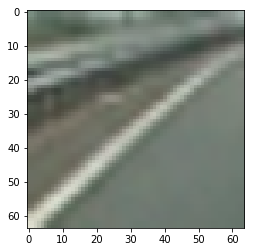

In [4]:
car_img = mpimg.imread('vehicle_detection_data/vehicles/KITTI_extracted/1.png')
non_car_img = mpimg.imread('vehicle_detection_data/non-vehicles/GTI/image13.png')

plt.imshow(car_img)
plt.show()
plt.imshow(non_car_img)
plt.show()

...


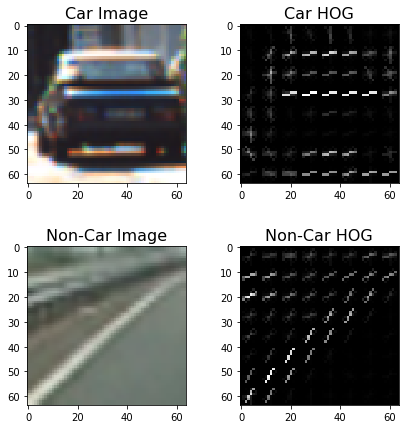

In [5]:
_, car_dst = get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
_, non_car_dst = get_hog_features(non_car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(non_car_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(non_car_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)
print('...')